<a href="https://colab.research.google.com/github/sophia172/XVI_UCM_Modelling_Week/blob/main/Gesture_recognition_exercise_UCM_modelling_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up environment

In [ ]:
import sys
print('The current python environment is located at %s'%sys.prefix)

# ! pip install tensorflow==2.5

The current python environment is located at /usr


In [ ]:
# Main
import pandas as pd
import numpy as np
import glob
import os
import time
import re

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Save Variables
import pickle

# Data Prep
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.cluster import DBSCAN

# Algos

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

#### Example dll directory for GPU running with tensorflow version below 2.6
#
# os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
# os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/cuda/bin")
####
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model

print('TensorFlow version is %s'%tf.version.GIT_VERSION)
print('The GPU for the machine learning exercise is %s'%tf.config.list_physical_devices('GPU'))

import platform
if platform.system() == 'Linux':
  # code is running on google colab
  data_folder = 'sample_data'
else:
  # code is running on windows
    HOME = os.path.expanduser("~")
    google_drive = os.path.join(HOME, 'Google_Drive_path') # Fill in yourfolder name
    models_folder = os.path.join('local_drive_path') # Fill in your folder name
    






TensorFlow version is v2.8.0-0-g3f878cff5b6
The GPU for the machine learning exercise is []


## CONSTANT variable


In [ ]:
DATA_TYPE = ['train', 'val', 'test', 'hold']

## Download dataset

In [7]:
### Upgrade gdown command if download fails.#######
# !pip install --upgrade --no-cache-dir gdown     #
###################################################

url = 'https://drive.google.com/drive/u/0/folders/1nbIbF6hXXceFE_YWLbWloR-8yZKjI2r0'
import gdown
gdown.download_folder(url, remaining_ok=True)


# Download the hold dataset for score
# url = 'https://drive.google.com/drive/u/0/folders/1nc4xr8hLiS8NKcTlnWZYvMVr-Wv52XpQ'
# gdown.download_folder(url)

## Load  data

### The dataset are splitted randomly into 4 sections


*   Train data
*   Validation data
*   Test data
*   Hold data

modelling_week_data offered datasets with 32 different split ways, as shown in Figure below.


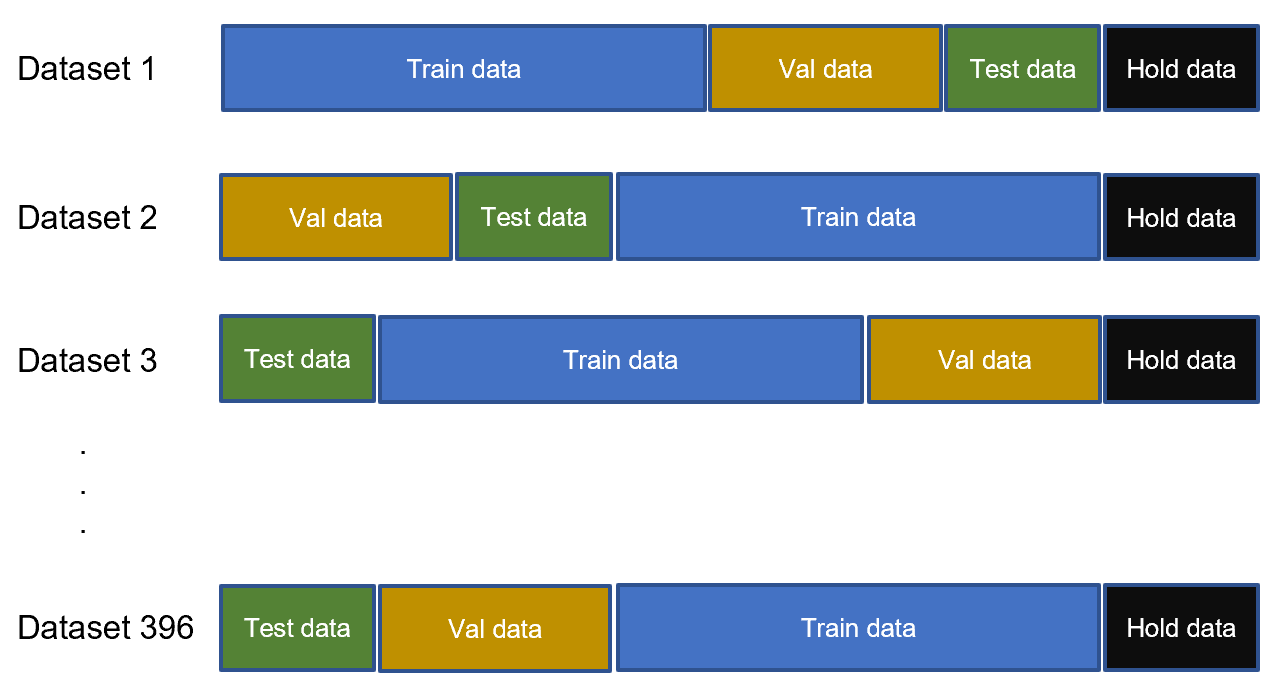


### Raw signals transform to the loaded dataset

1. We chose raw signals within a time window of 0.5 second with 5 channels.
2. Interpret dataset with consistent frequency of 40 Hz.
3. Flatten dataset and add label at the end.

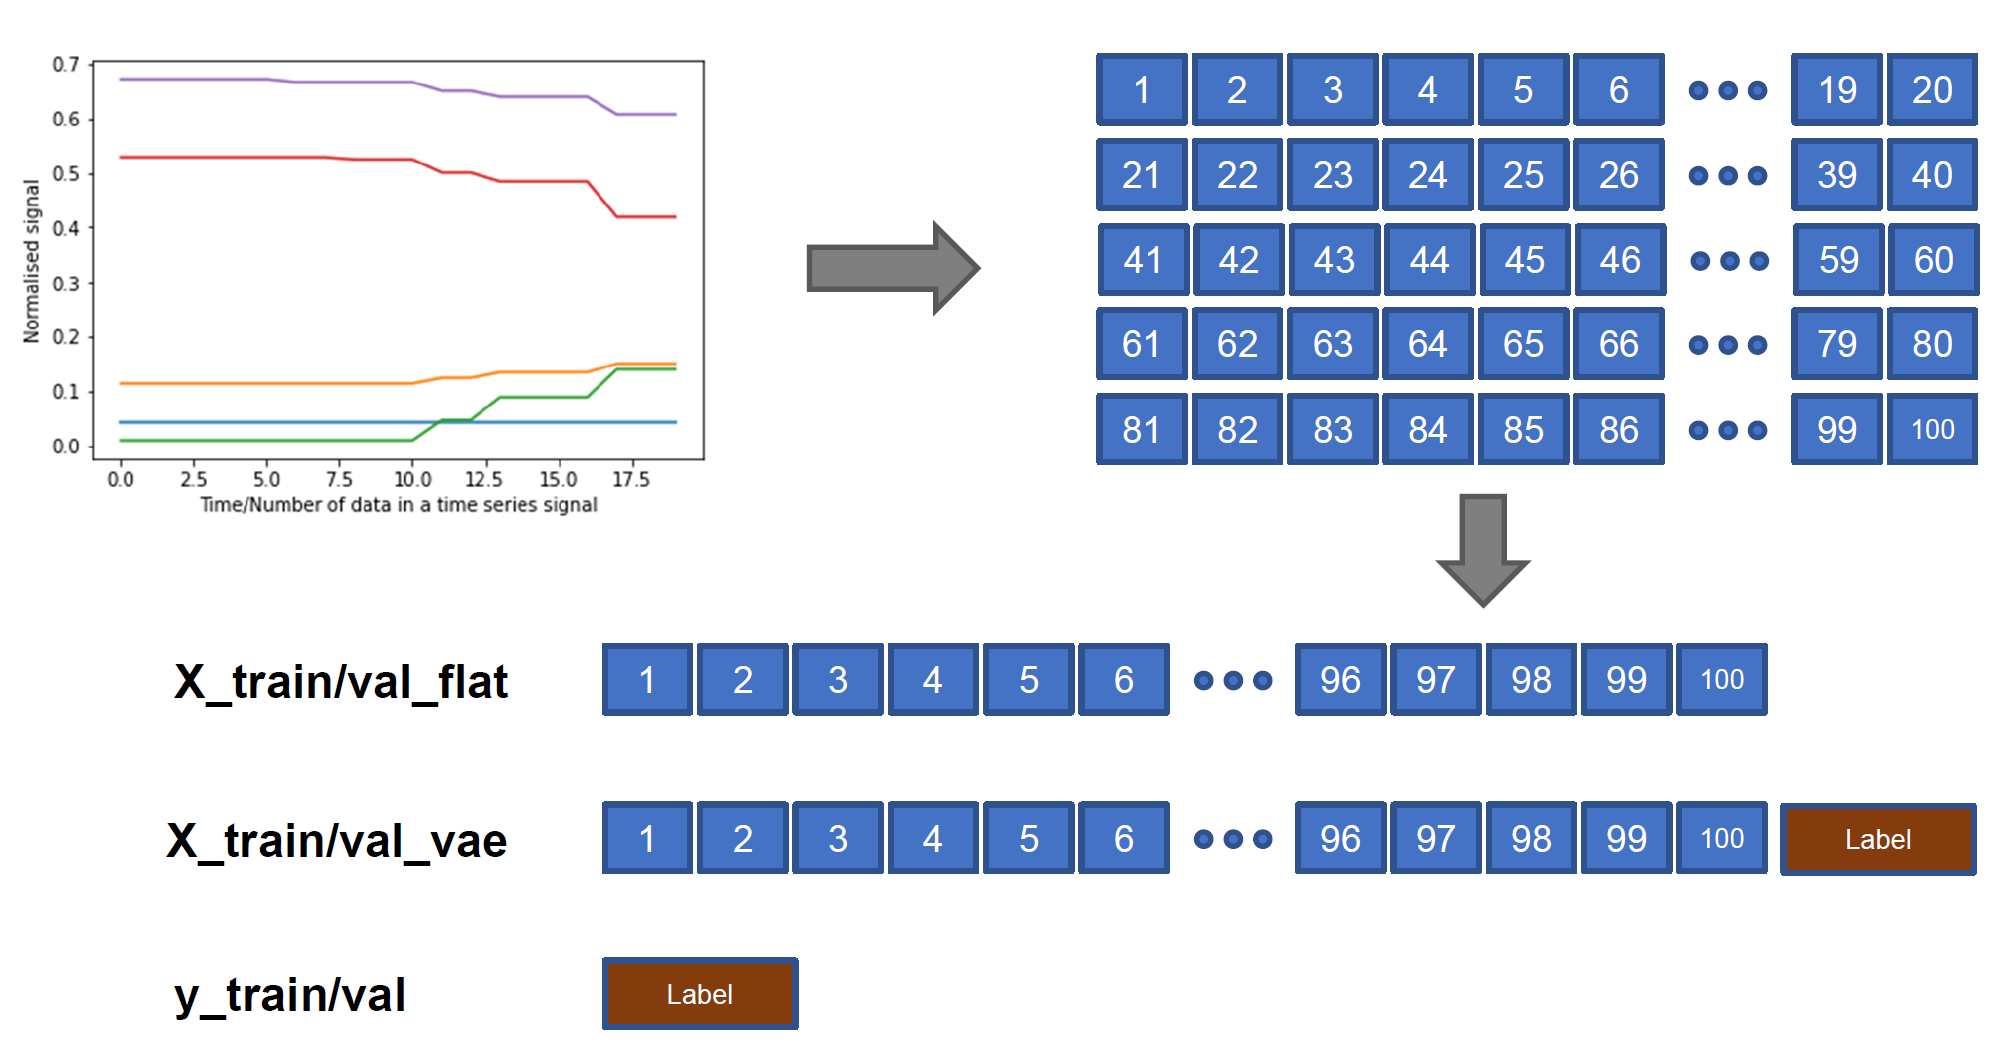

In [ ]:
def generate_input_data(i):
	data_df = pd.read_csv('modelling_week_data/dataset_%d.csv' % i)

	X_train = data_df[data_df.train_test == 'train'].iloc[:, 1:]
	X_val = data_df[data_df.train_test == 'validation'].iloc[:, 1:]
	X_test = data_df[data_df.train_test == 'test'].iloc[:, 1:]
	X_hold = data_df[data_df.train_test == 'hold'].iloc[:, 1:]

	X_train_tf = X_train.iloc[:, 0:100].to_numpy()
	X_val_tf = X_val.iloc[:, 0:100].to_numpy()
	X_test_tf = X_test.iloc[:, 0:100].to_numpy()
	X_hold_tf = X_hold.iloc[:, 0:100].to_numpy()

	y_train_tf = X_train.label.astype(int).to_numpy()
	y_val_tf = X_val.label.astype(int).to_numpy()
	y_test_tf = X_test.label.astype(int).to_numpy()
	y_hold_tf = X_hold.label.astype(int).to_numpy()

	X_train_tf_combined = np.hstack((X_train_tf, y_train_tf.reshape((-1, 1))))
	X_val_tf_combined = np.hstack((X_val_tf, y_val_tf.reshape((-1, 1))))
	X_test_tf_combined = np.hstack((X_test_tf, y_test_tf.reshape((-1, 1))))
	X_hold_tf_combined = np.hstack((X_hold_tf, y_hold_tf.reshape((-1, 1))))

	data = {}
	data['X_train_vae'] = X_train_tf_combined
	data['X_val_vae'] = X_val_tf_combined
	data['X_test_vae'] = X_test_tf_combined
	# data['X_hold_vae'] = X_hold_tf_combined

	data['X_train_flat'] = X_train_tf
	data['X_val_flat'] = X_val_tf
	data['X_test_flat'] = X_test_tf
	# data['X_hold_flat'] = X_hold_tf

	data['y_train'] = y_train_tf
	data['y_val'] = y_val_tf
	data['y_test'] = y_test_tf
	# data['y_hold'] = y_hold_tf

	return data


In [ ]:
data = generate_input_data(1)                                                   # manipulate the ID here for a different split of dataset
print('The dataset is a dictionary with keys ', data.keys())
for data_type in DATA_TYPE:
  print('The data shape in X_%s_vae is '%data_type, 
        data['X_%s_vae'%data_type].shape)
  print('The data shape in X_%s_flat is '%data_type, 
        data['X_%s_flat'%data_type].shape)
  print('The data shape in y_%s is '%data_type, 
        data['y_%s'%data_type].shape)

# Task1. classification using the combination of LDA and KNN 




In [ ]:
# Add your code here

# Task2. classification using the combination of PCA and KNN 




In [ ]:
# Add your code here

# Task3. Dimension reduction using Autoencoder




In [ ]:
# Add your code here

# Task4. classification using Vatianional Autoencoder



In [ ]:
# Add your code here

# Visualisation template for 3D transparent plot

In [ ]:

# Modify the code below for your model and data

mesh_size = 0.5
margin = 0


df_train = pd.DataFrame(np.hstack((X_train, y_train)),
                        columns=['pc1','pc2','pc3','label'])
df_test = pd.DataFrame(np.hstack((X_test, y_test)),
                        columns=['pc1','pc2','pc3','label'])
df = df_train
# Create a mesh grid on which we will run our model
pc1_min, pc1_max = df.pc1.min() - margin, df.pc1.max() + margin
pc2_min, pc2_max = df.pc2.min() - margin, df.pc2.max() + margin
pc3_min, pc3_max = df.pc3.min() - margin, df.pc3.max() + margin
pc1range = np.arange(pc1_min, pc1_max, mesh_size)
pc2range = np.arange(pc2_min, pc2_max, mesh_size)
pc3range = np.arange(pc3_min, pc3_max, mesh_size)

ll, ww, hh = np.meshgrid(pc1range, pc2range, pc3range)

# Create classifier, run predictions on grid

Z = model.predict(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
Z = Z.reshape(ll.shape)
proba = model.predict_proba(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
proba = proba.reshape(ll.shape + (4,))
# Compute the confidence, which is the difference

diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))



fig = go.Figure(data=[go.Scatter3d(
    x=df_test.pc1,
    y=df_test.pc2,
    z=df_test.pc3,
    mode='markers',
    marker=dict(
        size=2,
        color=df_test.label,               # set color to an array/list of desired values
        line=dict(width=0.1),
        colorscale=['Blue','Red','Green','Orange'],   # choose a colorscale
    )
)])


df_mesh = pd.DataFrame(np.c_[ll.ravel(), ww.ravel(), hh.ravel(),diff.ravel()], columns=['ll','ww','hh','label'])

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,0].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Blues',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,1].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Reds',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,2].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Greens',
        
    )
)


fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,3].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Oranges',
        
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)


fig.show()